In [ ]:
!pip install marimo -qq
import marimo as mo

## Домашнее задание 1
### Цель задания

Сегодня ваша задача как гейм-аналитика — написать код,  чтобы найти наиболее прибыльные жанры игр и решить, какие 3 игры продаются лучше всех.

### Навыки

|Архитектура|Базы данных|Форматы данных|Инструменты|Коммуникации|ИИ     |
|-----------|-----------|--------------|-----------|------------|-------|
|Отсутствует|нет        |CSV/JSON      |Git        |нет         |ChatGPT|

### Условия

Можно пользоваться любыми языковыми моделями.

###  Формат сдачи и отправка задания

Итоговый блокнот нужно разместить на GitLab либо на GitHub («запушить» в любом формате .py или .ipynb)
и поделиться ссылкой на файл (убедившись в видимости репозитория).

###  Критерии оценивания

| Критерий | Вес | Описание |
|----------|-----|-----------|
| **Основная функциональность** | 2 | Все основные требования задания выполнены корректно (задания 2 и 4) |
| | 1 | Большая часть требований выполнена, но есть незначительные недочеты или пропуски |
|  | 0 | Основные требования не выполнены или выполнены некорректно|
| **Выбор алгоритма** | 1.5 | Выбранные подходы и алгоритмы (например, groupby().sum()) оптимальны и уместны для задачи |
|  | 0.5 | Подходы в целом верны, но могли бы быть более эффективными или уместными |
|  | 0 | Подходы не соответствуют задаче |
| **Точность реализации** | 1.5 | Код реализован корректно, без ошибок, расчеты точны, логика полностью соответствует задаче |
|  | 0.5 | Есть мелкие неточности или логические ошибки, не влияющие критически на результат |
|  | 0 | Содержит существенные ошибки, препятствующие получению верного результата|
| **Обработка краевых случаев** | 1 | Код устойчив к различным входным данным, учтены потенциальные краевые условия |
|  | 0 | Краевые случаи не учтены, возможны ошибки в специфических сценариях |
| **Документация к коду** | 1 | Код прокомментирован, комментарии ясны, помогают понять логику |
|  | 0 | Комментарии отсутствуют или бесполезны |
| **Объяснение результатов** | 1 | Выводы по результатам работы кода четкие, логичные и обоснованные данными |
|  | 0 | Выводы отсутствуют или не имеют отношения к данным |
| **Стиль кода** | 1 | Код читаем, соответствует стандартам PEP-8 |
|  | 0 | Код плохо читаем, стандарты стиля не соблюдены |
| **Анализ ошибок и отладка** | 1 | Способность выявить, понять и исправить ошибку (задание 5) показана полностью и эффективно |
|  | 0 | Ошибка не исправлена или понимание ее причин отсутствует |


**Максимальный балл за выполненную домашнюю работу: 10 баллов**

**Дополнительные условия оценки:**

Можно сдать работу через обычный Google Colab без начисления штрафных баллов и поделиться ссылкой на файл.

**Как будет проверяться:**

Работа будет проверяться преподавателем вручную в течение максимум одной недели.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_id = '1y1fqg7yWO6ifgnyJkuZ8IwmMqZjNCUq_'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
videogames_dataset = pd.read_csv(url)
videogames_dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### **Задание 1**

Поработайте с кодом выше и скачайте датасет. Используя промпт ниже, скормите вашей LLM датасет и получите описание набора данных.
```
опишите набор данных на русском языке @videogames_dataset
```

#### Хорошая новость — вы моментально получите описание набора данных.

Данный набор данных содержит информацию о видеоиграх. Вот описание каждого столбца:

- `Name`: название видеоигры;
- `Platform`: платформа, для которой была выпущена игра (например, Wii, NES);
- `Year_of_Release`: год выпуска игры;
- `Genre`: жанр игры (например, спорт, гонки);
- `Publisher`: издатель игры;
- `NA_Sales`: продажи в Северной Америке (в миллионах единиц);
- `EU_Sales`: продажи в Европе (в миллионах единиц);
- `JP_Sales`: продажи в Японии (в миллионах единиц);
- `Other_Sales`: продажи в других регионах (в миллионах единиц);
- `Global_Sales`: глобальные продажи (в миллионах единиц);
- `Critic_Score`: оценка критиков (максимально 100);
- `Critic_Count`: количество оценок критиков;
- `User_Score`: оценка пользователей (обычно до 10);
- `User_Count`: количество оценок пользователей;
- `Developer`: разработчик игры;
- `Rating`: рейтинг ESRB (возрастная категория игры).

#### Плохая новость — за выполнение задания таким образом вы получите ноль баллов.

 Почему?

 Вы не писали код при выполнении этого задания.

 Мы здесь для того, чтобы научиться писать код при работе с данными.

### **Задание 2**



Сделайте вывод: какие три жанра игр приносят наибольшую выручку?

In [ ]:
profitable_genres = videogames_dataset.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
profitable_genres.head(3)

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94


Наибольшую выручку приносят жанры Action, Sports, Shooter.

### **Задание 3**

Вы сохраняли результат своей работы локально. Насколько это удобно с точки зрения работы в компании, где в работу вовлечены коллегами?

Неудобно, потому что нарушает воспроизводимость, версионирование и коллаборацию, результаты зависят от одного человека и его компьютера.

### **Задание 4**

Подтвердите или опровергните вывод о том, что первые три строчки в глобальных продажах Nintendo занимают игры:

- Wii Sports;
- Super Mario Bros;
- Mario Kart Wii.

In [ ]:
nintendo_global = (
    videogames_dataset[videogames_dataset['Publisher'] == 'Nintendo']
    .nlargest(3, 'Global_Sales')[['Name', 'Global_Sales']]
)
nintendo_global

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52


Вывод о том, что первые три строчки в глобальных продажах Nintendo занимают игры Wii Sports; Super Mario Bros; Mario Kart Wii подтверждаю.

### **Задание 5**

При написании кода разработчики и дата-сайентисты допускают ошибки. Это нормально — ошибки неизбежно возникают при создании программного обеспечения. По разным данным, на устранение багов тратится до 25% времени. Допустим, что при выполнении задания №4 вы допустили досадную оплошность и при создании датафрейма указали несуществующий метод **from_dictionary** вместо правильного метода **from_dict**.

1. Скопируйте код ниже.

2. Создайте ячейку с кодом (нажав на кнопку Python внизу).

3. Если вы работаете через marimo notebook, то вставьте код в созданную ячейку и получите ошибку *AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'*
Если вы используете другую среду, обратитесь к LLM напрямую.

4. Если вы работаете через marimo notebook, то исправьте ошибку, нажав на кнопку Fix with AI и затем нажмите Enter в открывшейся ячейке. После завершения генерации нажми Accept справа, чтобы вставить исправленный результат в блокнот.
Если вы используете другую среду, обратитесь к LLM напрямую.


```python
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df
```

In [ ]:
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')

AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'

**Исправленный вариант:**

In [ ]:
df = pd.DataFrame.from_dict([
    {"Name":"Wii Sports","Global_Sales":82.53},
    {"Name":"Super Mario Bros.","Global_Sales":40.24},
    {"Name":"Mario Kart Wii","Global_Sales":35.52}
], orient='columns')
df

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52


### **Задание на дополнительный балл**

Скопируйте код ниже, создайте ячейку с кодом (нажав на кнопку Python внизу) и вставьте код в созданную ячейку.

Постройте график зависимости потребности в труде L (по оси Y) от доли задач, подлежащих полной автоматизации $Φ(i)$ (по оси Х) ,
используя формулу $Φ = K/L   / (1 + K/L)$, где L — количество единиц рабочей силы, $K$ — количество единиц капитала, $Φ(i)$ — функция распределения.

```python
df = pd.DataFrame.from_dictionary([ {"K":[0.00,0.25,0.50,0.75,1.00]},
                                    {"L":[1.00,0.75,0.50,0.25,0.00]},
                                    {"phi":[0.00,0.25,0.50,0.75,"∞" ]}],
                                     orient='columns')
df
```

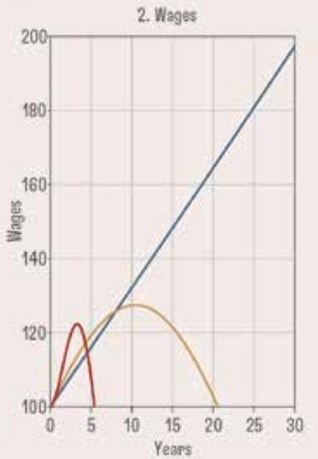

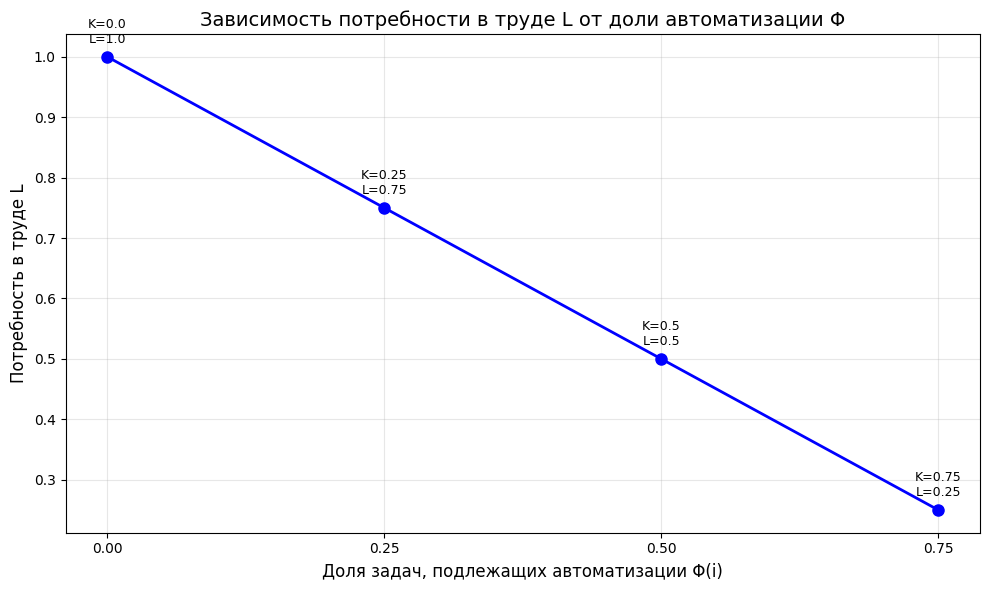

In [ ]:
# Создаем DataFrame с правильными данными
df = pd.DataFrame({
    'K': [0.00, 0.25, 0.50, 0.75, 1.00],
    'L': [1.00, 0.75, 0.50, 0.25, 0.00],
    'phi': [0.00, 0.25, 0.50, 0.75, np.inf]
})

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(df['phi'], df['L'], 'bo-', linewidth=2, markersize=8)
plt.title('Зависимость потребности в труде L от доли автоматизации Φ', fontsize=14)
plt.xlabel('Доля задач, подлежащих автоматизации Φ(i)', fontsize=12)
plt.ylabel('Потребность в труде L', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df['phi'][:-1])  # Исключаем бесконечность из ticks

# Добавляем аннотации для точек
for i, (phi, L) in enumerate(zip(df['phi'], df['L'])):
    if phi != np.inf:
        plt.annotate(f'K={df["K"][i]}\nL={L}',
                    (phi, L),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=9)

plt.tight_layout()
plt.show()

Проведите сравнение заработных плат при разных сценариях полной автоматизации. Для выполнения задания изучите источник: https://www.nber.org/system/files/working_papers/w32255/w32255.pdf

*1. Сценарий "Бизнес-как-обычай" (неограниченная сложность задач)*

    Зарплата постоянно растёт (~2% в год). Автоматизация медленная, капитал накапливается быстрее, труд остаётся дефицитным.

*2. Сценарий "Базовый" (полная автоматизация за 20 лет)*

    Зарплата сначала растёт, затем резко падает до уровня возврата на капитал (w=A). Автоматизация обгоняет накопление капитала, труд теряет ценность.

*3. Сценарий "Агрессивный" (полная автоматизация за 5 лет)*

    Зарплата падает очень быстро (через 3–4 года). Сверхбыстрая автоматизация → избыток труда → коллапс зарплат.

*4. Сценарий "Эпизод автоматизации" (резкий старт + длинный хвост сложных задач)*

    Зарплата временно падает, но затем восстанавливается и растёт. После начального шока капитал накапливается, а оставшиеся неавтоматизированные задачи поддерживают спрос на труд.

  **Вывод:** зарплаты растут только если автоматизация идёт медленнее, чем накопление капитала. При быстрой или полной автоматизации зарплаты падают до w=A (предельная производительность капитала).